OLS Regression

In [5]:
import statsmodels.api as sm
import pandas as pd


# Dataset for OLS regression
final_transformed_data_path = '/Users/dhruvtrivedi/Downloads/Final Project Stat 371/Final_Transformed_Farm_Data_Gujarat_v2.csv'
df = pd.read_csv(final_transformed_data_path)

# Preparing the data for OLS regression
# Defining the target variable
target = 'Average Daily Milk Production (litres)'

# Defining the predictor variables (all other columns)
predictors = df.drop(target, axis=1)

# Adding a constant to the model (for intercept)
predictors_with_constant = sm.add_constant(predictors)

# Performing OLS regression
model = sm.OLS(df[target], predictors_with_constant)
results = model.fit()

# Summary statistics of the model
results.summary()


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.585
Model:                                                OLS   Adj. R-squared:                  0.546
Method:                                     Least Squares   F-statistic:                     15.03
Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           1.02e-37
Time:                                            19:45:10   Log-Likelihood:                -2251.7
No. Observations:                                     292   AIC:                             4555.
Df Residuals:                                         266   BIC:                             4651.
Df Model:                                              25                                         
Covariance Type:                                nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    214.0502    219.627      0.975      0.331    -218.378     646.479
Number of Cows                                             3.0344      0.336      9.041      0.000       2.374       3.695
Number of Buffaloes                                        2.5291      0.435      5.811      0.000       1.672       3.386
Number of Family Members/Employees Working at the Farm     1.2873      2.701      0.477      0.634      -4.032       6.606
ahmedabad                                               -234.7569    108.585     -2.162      0.032    -448.553     -20.961
jamnagar                                                -117.4678    109.095     -1.077      0.283    -332.267      97.331
rajkot                                                  -211.7515    114.266     -1.853      0.065    -436.733      13.230
surat                                                   -138.1897    111.133     -1.243      0.215    -357.001      80.622
aavin                                                     72.1190    138.588      0.520      0.603    -200.750     344.988
amul                                                      51.8319    152.322      0.340      0.734    -248.079     351.743
dudhsagar dairy                                           77.5287    153.446      0.505      0.614    -224.595     379.652
dynamix dairy                                           -315.0179    175.057     -1.800      0.073    -659.691      29.655
karnataka co-operative milk federation                   124.3128    161.807      0.768      0.443    -194.273     442.899
mother dairy                                             -39.6507    147.564     -0.269      0.788    -330.193     250.892
orissa state cooperative milk producers federation       191.7776    144.317      1.329      0.185     -92.371     475.926
parag milk foods ltd                                       9.9635    147.334      0.068      0.946    -280.125     300.052
selling privately to consumers                           125.1362    152.651      0.820      0.413    -175.422     425.694
verka                                                     79.0992    183.174      0.432      0.666    -281.555     439.754
natural plants                                            93.5826     69.847      1.340      0.181     -43.942     231.107
Use_of_Automation                                        -45.6629     76.078     -0.600      0.549    -195.454     104.129
Daily Expenditure on Animal Health

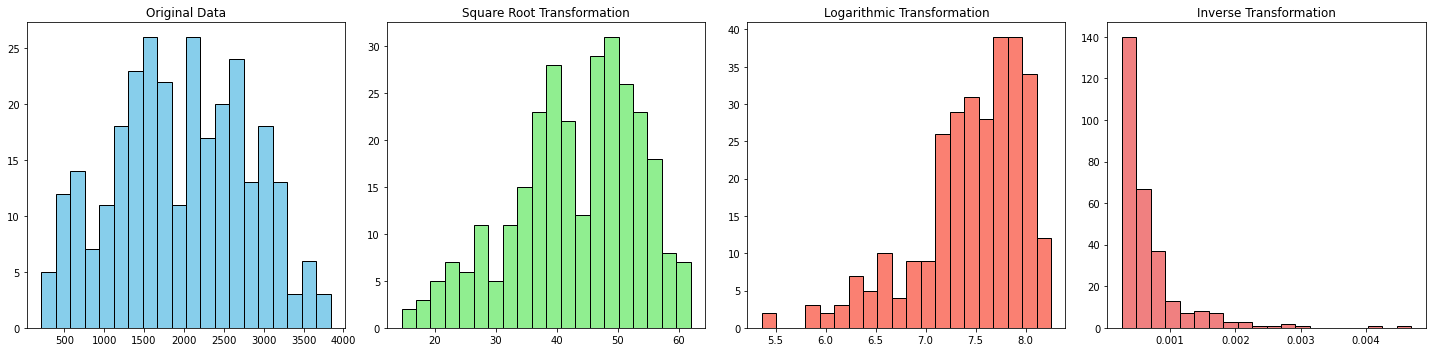

(ShapiroResult(statistic=0.9831531643867493, pvalue=0.0016427095979452133),
 ShapiroResult(statistic=0.9701030850410461, pvalue=9.163556569546927e-06),
 ShapiroResult(statistic=0.9117769598960876, pvalue=4.5161092747381115e-12),
 ShapiroResult(statistic=0.6394598484039307, pvalue=2.22295244406673e-24))

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Response variable - "Average Daily Milk Production per day (in litres)"
response_var = 'Average Daily Milk Production (litres)'

# Applying transformations
df['sqrt_transformation'] = np.sqrt(df[response_var])
df['log_transformation'] = np.log(df[response_var] + 1)  # Adding 1 to avoid log(0)
df['inverse_transformation'] = 1 / (df[response_var] + 1)  # Adding 1 to avoid division by 0

# Plotting histograms
plt.figure(figsize=(20, 5))

# Original data histogram
plt.subplot(1, 4, 1)
plt.hist(df[response_var], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Data')

# Square root transformation histogram
plt.subplot(1, 4, 2)
plt.hist(df['sqrt_transformation'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Square Root Transformation')

# Logarithmic transformation histogram
plt.subplot(1, 4, 3)
plt.hist(df['log_transformation'], bins=20, color='salmon', edgecolor='black')
plt.title('Logarithmic Transformation')

# Inverse transformation histogram
plt.subplot(1, 4, 4)
plt.hist(df['inverse_transformation'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Inverse Transformation')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
sw_original = stats.shapiro(df[response_var])
sw_sqrt = stats.shapiro(df['sqrt_transformation'])
sw_log = stats.shapiro(df['log_transformation'])
sw_inverse = stats.shapiro(df['inverse_transformation'])

sw_original, sw_sqrt, sw_log, sw_inverse


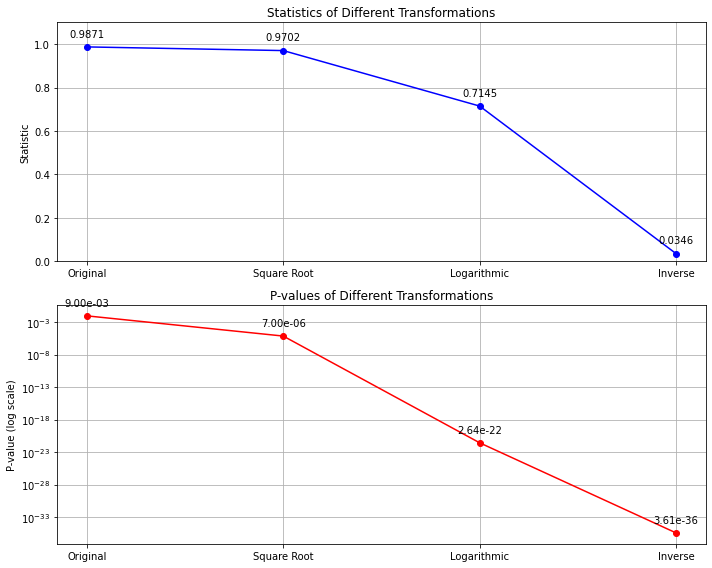

In [9]:
import matplotlib.pyplot as plt

# Data to plot
transformations = ['Original', 'Square Root', 'Logarithmic', 'Inverse']
statistics = [0.9871, 0.9702, 0.7145, 0.0346]
p_values = [0.0090, 0.000007, 2.64e-22, 3.61e-36]

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting statistics
ax1.plot(transformations, statistics, 'o-', color='blue', label='Statistic')
ax1.set_title('Statistics of Different Transformations')
ax1.set_ylabel('Statistic')
ax1.set_ylim(0, 1.1)
ax1.grid(True)

# Adding annotations for statistics
for i, txt in enumerate(statistics):
    ax1.annotate(f'{txt:.4f}', (transformations[i], statistics[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plotting p-values
ax2.plot(transformations, p_values, 'o-', color='red', label='P-value')
ax2.set_yscale('log')  # Log scale for better visualization of small p-values
ax2.set_title('P-values of Different Transformations')
ax2.set_ylabel('P-value (log scale)')
ax2.grid(True)

# Adding annotations for p-values
for i, txt in enumerate(p_values):
    ax2.annotate(f'{txt:.2e}', (transformations[i], p_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['variable'] = predictors.columns
vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Displaying the VIF for each variable
vif_data.sort_values(by='VIF', ascending=False)

,variable,VIF
22,Daily Revenue (INR),22.626124
0,Number of Cows,8.568805
20,Daily Income from Selling Manure (INR),6.150645
1,Number of Buffaloes,5.952573
19,Daily Expenditure on Animal Health (INR),5.561436
21,Daily Operating Costs (INR),5.468870
2,Number of Family Members/Employees Working at ...,4.499684
4,jamnagar,2.141800
6,surat,2.062678
18,Use_of_Automation,1.964859


In [12]:
import pandas as pd


# Dataset for OLS regression
final_transformed_data_path = '/Users/dhruvtrivedi/Downloads/Final Project Stat 371/Final_Transformed_Farm_Data_Gujarat_v2.csv'
df = pd.read_csv(final_transformed_data_path)

# Creating the 'Balance Money per Day' variable in the dataset
df['Balance Money per Day'] = df['Daily Revenue (INR)'] + df['Daily Income from Selling Manure (INR)'] - df['Daily Operating Costs (INR)'] - df['Daily Expenditure on Animal Health (INR)']

# Dropping the original components of the 'Balance Money per Day' variable
predictors_full_model = df.drop(['Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', 'Daily Operating Costs (INR)', 'Daily Expenditure on Animal Health (INR)', target], axis=1)

# Calculating VIF for the full model with the new 'Balance Money per Day' variable
vif_data_full_model = pd.DataFrame()
vif_data_full_model['variable'] = predictors_full_model.columns
vif_data_full_model['VIF'] = [variance_inflation_factor(predictors_full_model.values, i) for i in range(predictors_full_model.shape[1])]

# Displaying the VIF for each variable in the full model
vif_data_full_model.sort_values(by='VIF', ascending=False)


,variable,VIF
1,Number of Buffaloes,5.020027
2,Number of Family Members/Employees Working at ...,4.327009
0,Number of Cows,4.175240
4,jamnagar,2.054555
6,surat,2.051606
18,Use_of_Automation,1.935643
8,amul,1.866011
12,mother dairy,1.861064
14,parag milk foods ltd,1.841169
17,natural plants,1.839625


In [13]:
# Dropping the individual fiscal variables used in the 'Balance Money per Day' calculation
predictors_ols = df.drop(['Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', 
                          'Daily Operating Costs (INR)', 'Daily Expenditure on Animal Health (INR)', 
                          target], axis=1)

# Adding a constant to the model (for intercept)
predictors_ols_with_constant = sm.add_constant(predictors_ols)

# Performing OLS regression with the new model
ols_model = sm.OLS(df[target], predictors_ols_with_constant)
ols_results = ols_model.fit()

# Outputting the summary statistics of the model
ols_results.summary()


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.557
Model:                                                OLS   Adj. R-squared:                  0.521
Method:                                     Least Squares   F-statistic:                     15.40
Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           5.84e-36
Time:                                            19:49:46   Log-Likelihood:                -2261.2
No. Observations:                                     292   AIC:                             4568.
Df Residuals:                                         269   BIC:                             4653.
Df Model:                                              22                                         
Covariance Type:                                nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    604.0985    155.899      3.875      0.000     297.161     911.036
Number of Cows                                             3.6081      0.272     13.264      0.000       3.072       4.144
Number of Buffaloes                                        3.0491      0.420      7.262      0.000       2.222       3.876
Number of Family Members/Employees Working at the Farm    -0.3954      2.680     -0.148      0.883      -5.671       4.880
ahmedabad                                               -217.1711    110.876     -1.959      0.051    -435.466       1.124
jamnagar                                                 -80.2231    111.180     -0.722      0.471    -299.116     138.670
rajkot                                                  -119.8591    114.794     -1.044      0.297    -345.868     106.150
surat                                                   -131.0674    113.736     -1.152      0.250    -354.992      92.858
aavin                                                     81.2378    140.827      0.577      0.565    -196.025     358.500
amul                                                      92.5566    155.491      0.595      0.552    -213.577     398.691
dudhsagar dairy                                           74.9999    155.184      0.483      0.629    -230.530     380.530
dynamix dairy                                           -313.8279    178.809     -1.755      0.080    -665.872      38.216
karnataka co-operative milk federation                   108.1122    165.295      0.654      0.514    -217.325     433.549
mother dairy                                             -54.2924    150.642     -0.360      0.719    -350.880     242.295
orissa state cooperative milk producers federation       178.8274    144.984      1.233      0.218    -106.620     464.274
parag milk foods ltd                                     -43.2276    145.355     -0.297      0.766    -329.405     242.950
selling privately to consumers                            19.1168    154.320      0.124      0.902    -284.713     322.946
verka                                                    -20.0783    185.814     -0.108      0.914    -385.914     345.757
natural plants                                            93.0422     71.692      1.298      0.195     -48.107     234.191
Use_of_Automation                                        -45.9189     77.912     -0.589      0.556    -199.313     107.475
Satisfaction_5_7                  

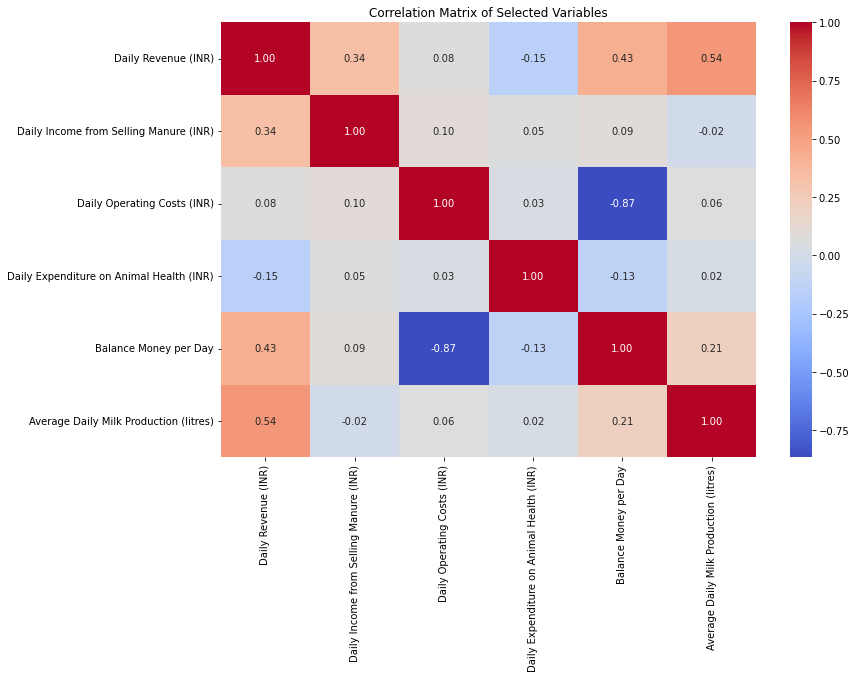

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting variables for the correlation graph
variables_for_correlation = ['Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', 
                             'Daily Operating Costs (INR)', 'Daily Expenditure on Animal Health (INR)',
                             'Balance Money per Day', 'Average Daily Milk Production (litres)']
correlation_data = df[variables_for_correlation]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.show()


In [15]:
# Creating the full model including the location variables
full_model = sm.OLS(df[target], predictors_ols_with_constant).fit()

# Creating a reduced model that excludes the location variables: Ahmedabad, Rajkot, Surat, and Jamnagar
predictors_reduced = predictors_ols_with_constant.drop(['ahmedabad', 'rajkot', 'surat', 'jamnagar'], axis=1)
reduced_model = sm.OLS(df[target], predictors_reduced).fit()

# Performing an F-test to compare the full model against the reduced model
f_test_result = full_model.compare_f_test(reduced_model)

# Outputting the F-test results
f_test_result


(1.0328495120584136, 0.3906413159749041, 4.0)

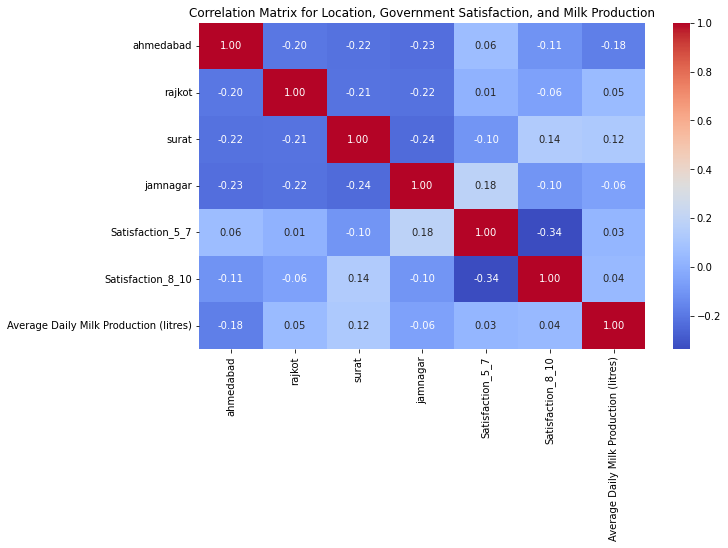

In [16]:
# Selecting variables for correlation analysis: location variables, government satisfaction, and the target variable
variables_for_correlation = ['ahmedabad', 'rajkot', 'surat', 'jamnagar', 
                             'Satisfaction_5_7', 'Satisfaction_8_10', 
                             'Average Daily Milk Production (litres)']
correlation_data_places = df[variables_for_correlation]

# Calculating the correlation matrix
correlation_matrix_places = correlation_data_places.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_places, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Location, Government Satisfaction, and Milk Production")
plt.show()


In [19]:
# Creating the full model including the location variables
full_model = sm.OLS(df[target], predictors_ols_with_constant).fit()

# Creating a reduced model that excludes the location variables: Ahmedabad, Rajkot, Surat, and Jamnagar
predictors_reduced = predictors_ols_with_constant.drop(['Satisfaction_5_7', 'Satisfaction_8_10'], axis=1)
reduced_model = sm.OLS(df[target], predictors_reduced).fit()

# Performing an F-test to compare the full model against the reduced model
f_test_result = full_model.compare_f_test(reduced_model)

# Outputting the F-test results
f_test_result


(0.7485146408525016, 0.47405139609970803, 2.0)

/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the 

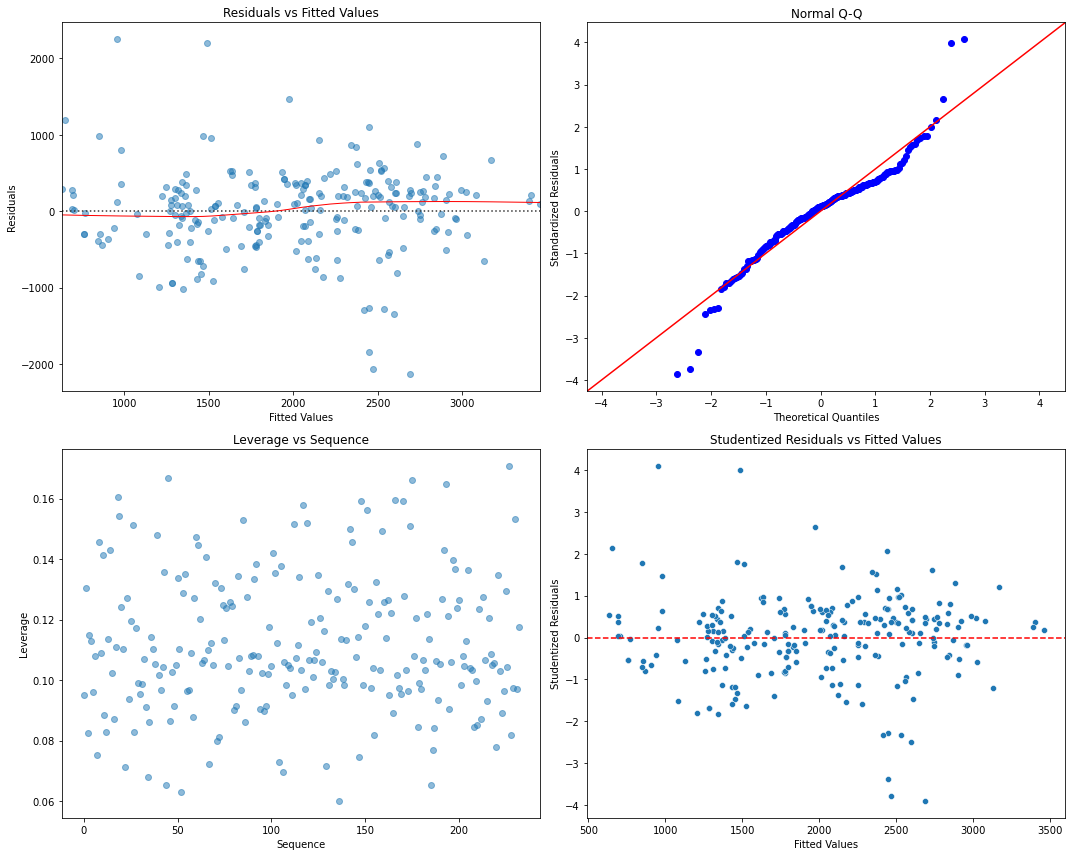

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/Users/dhruvtrivedi/Downloads/Final Project Stat 371/Final_Transformed_Farm_Data_Gujarat_v2.csv'
data = pd.read_csv(file_path)

# Prepare the data for the model
X = data.drop('Average Daily Milk Production (litres)', axis=1)
y = data['Average Daily Milk Production (litres)']
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Add a constant for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model with statsmodels
model = sm.OLS(y_train, X_train_sm).fit()

# Calculate residuals and leverage
residuals = model.resid
fitted_vals = model.predict(X_train_sm)
leverage = model.get_influence().hat_matrix_diag
studentized_residuals = model.get_influence().resid_studentized_internal

# Create sequence of numbers for plotting
sequence = np.arange(len(residuals))

# Create the 4 plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Residuals vs Fitted Values
sns.residplot(fitted_vals, y_train, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 0])
axs[0, 0].set_title('Residuals vs Fitted Values')
axs[0, 0].set_xlabel('Fitted Values')
axs[0, 0].set_ylabel('Residuals')

# Normal Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q')
axs[0, 1].set_xlabel('Theoretical Quantiles')
axs[0, 1].set_ylabel('Standardized Residuals')

# Leverage vs Sequence
axs[1, 0].scatter(sequence, leverage, alpha=0.5)
axs[1, 0].set_title('Leverage vs Sequence')
axs[1, 0].set_xlabel('Sequence')
axs[1, 0].set_ylabel('Leverage')

# Studentized Residuals vs Fitted Values
sns.scatterplot(fitted_vals, studentized_residuals, ax=axs[1, 1])
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_title('Studentized Residuals vs Fitted Values')
axs[1, 1].set_xlabel('Fitted Values')
axs[1, 1].set_ylabel('Studentized Residuals')

plt.tight_layout()
plt.show()


Removing Outliers and Plotting again 

/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the 

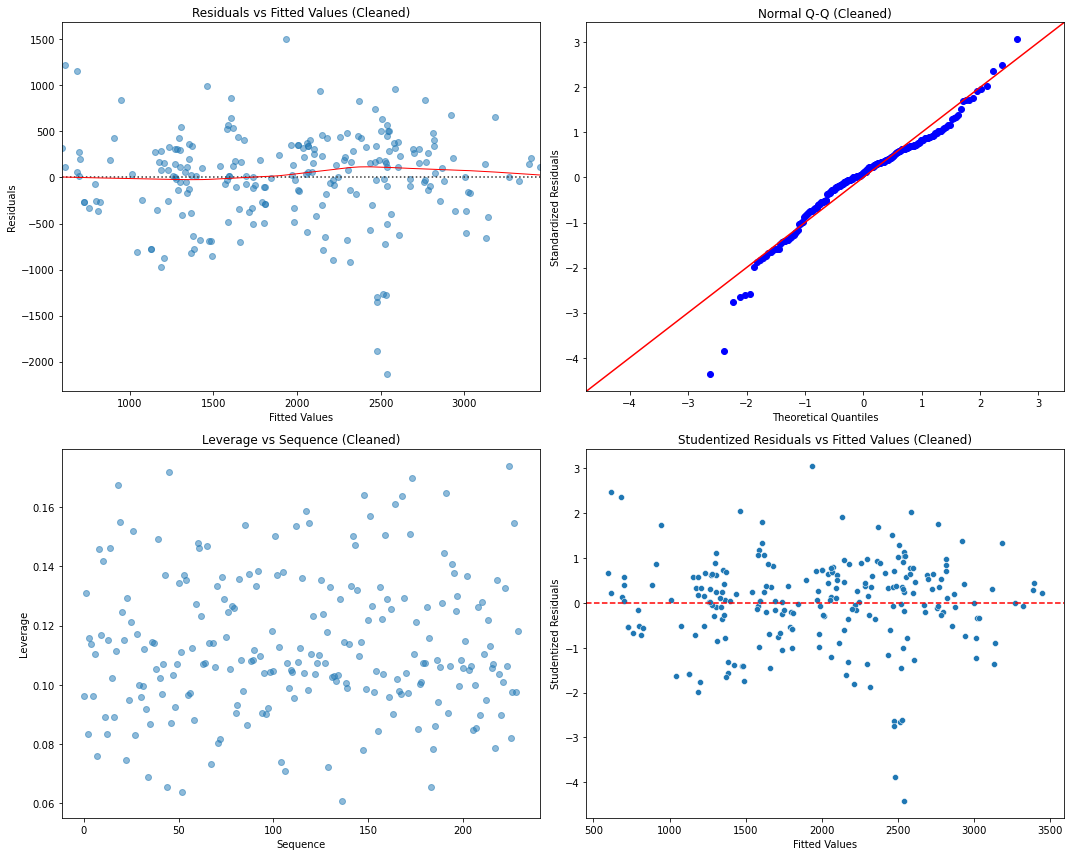

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import OLSInfluence

# Load the dataset
file_path = '/Users/dhruvtrivedi/Downloads/Final Project Stat 371/Final_Transformed_Farm_Data_Gujarat_v2.csv'
data = pd.read_csv(file_path)

# Prepare the data for the model
X = data.drop('Average Daily Milk Production (litres)', axis=1)
y = data['Average Daily Milk Production (litres)']
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Add a constant for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model with statsmodels
model = sm.OLS(y_train, X_train_sm).fit()

# Calculate residuals and leverage
residuals = model.resid
fitted_vals = model.predict(X_train_sm)
leverage = model.get_influence().hat_matrix_diag
studentized_residuals = OLSInfluence(model).resid_studentized_internal

# Redefine the function to remove outliers based on studentized residuals and QQ plot
def remove_outliers(X, y):
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Get influence measures
    influence = model.get_influence()
    
    # Obtain standardized residuals
    studentized_residuals = influence.resid_studentized_internal
    
    # Identify outliers in studentized residuals
    outliers_studentized = np.abs(studentized_residuals) > 4
    
    # Get theoretical quantiles and sample quantiles for QQ plot
    qq_plot = ProbPlot(studentized_residuals)
    qq_outliers = np.abs(studentized_residuals) > np.percentile(np.abs(studentized_residuals), 99)  # Top 1%
    
    # Combine outliers
    outliers_combined = outliers_studentized | qq_outliers
    
    # Remove outliers
    X_clean = X.loc[~outliers_combined, :]
    y_clean = y.loc[~outliers_combined]
    
    return X_clean, y_clean

# Remove outliers from training set
X_train_cleaned, y_train_cleaned = remove_outliers(X_train_sm, y_train)

# Refit the model without outliers
model_cleaned = sm.OLS(y_train_cleaned, X_train_cleaned).fit()

# Recalculate the diagnostics for the cleaned data
studentized_residuals_cleaned = OLSInfluence(model_cleaned).resid_studentized_internal
leverage_cleaned = OLSInfluence(model_cleaned).hat_matrix_diag
fitted_vals_cleaned = model_cleaned.predict(X_train_cleaned)
residuals_cleaned = model_cleaned.resid

# Diagnostic plots for the cleaned model
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Residuals vs Fitted Values
sns.residplot(fitted_vals_cleaned, y_train_cleaned, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 0])
axs[0, 0].set_title('Residuals vs Fitted Values (Cleaned)')
axs[0, 0].set_xlabel('Fitted Values')
axs[0, 0].set_ylabel('Residuals')

# Normal Q-Q plot
sm.qqplot(residuals_cleaned, line='45', fit=True, ax=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q (Cleaned)')
axs[0, 1].set_xlabel('Theoretical Quantiles')
axs[0, 1].set_ylabel('Standardized Residuals')

# Leverage vs Sequence
sequence_cleaned = np.arange(len(leverage_cleaned))
axs[1, 0].scatter(sequence_cleaned, leverage_cleaned, alpha=0.5)
axs[1, 0].set_title('Leverage vs Sequence (Cleaned)')
axs[1, 0].set_xlabel('Sequence')
axs[1, 0].set_ylabel('Leverage')

# Studentized Residuals vs Fitted Values
sns.scatterplot(fitted_vals_cleaned, studentized_residuals_cleaned, ax=axs[1, 1])
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_title('Studentized Residuals vs Fitted Values (Cleaned)')
axs[1, 1].set_xlabel('Fitted Values')
axs[1, 1].set_ylabel('Studentized Residuals')

plt.tight_layout()
plt.show()


“Modern” Forward Selection with AIC

In [45]:
import pandas as pd

# Load the dataset
file_path = '/Users/dhruvtrivedi/Downloads/Final Project Stat 371/Final_Transformed_Farm_Data_Gujarat_v2.csv'
farm_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
farm_data.head()

,Number of Cows,Number of Buffaloes,Average Daily Milk Production (litres),Number of Family Members/Employees Working at the Farm,ahmedabad,jamnagar,rajkot,surat,aavin,amul,...,selling privately to consumers,verka,natural plants,Use_of_Automation,Daily Expenditure on Animal Health (INR),Daily Income from Selling Manure (INR),Daily Operating Costs (INR),Daily Revenue (INR),Satisfaction_5_7,Satisfaction_8_10
0,172,11,1075,38,0,1,0,0,0,0,...,0,0,0,0,138.745205,118.421918,3088.800000,2565.566667,1,0
1,47,23,350,39,0,0,0,0,0,0,...,0,0,0,0,273.260274,19.208219,1364.300000,1417.200000,0,0
2,117,187,1520,12,0,0,1,0,1,0,...,0,0,0,1,260.575342,19.208219,2756.300000,2164.133333,0,1
3,192,130,1610,44,0,1,0,0,0,0,...,1,0,0,1,68.167123,111.246575,6399.766667,2963.500000,0,0
4,323,98,2360,25,1,0,0,0,0,0,...,0,1,1,1,148.049315,53.482192,1567.266667,2755.700000,1,0


In [48]:
import statsmodels.api as sm

# Dependent variable
y = farm_data['Average Daily Milk Production (litres)']

# Creating a null model
X_null = sm.add_constant(pd.Series(1, index=farm_data.index))
null_model = sm.OLS(y, X_null).fit()

# AIC of the null model
null_model_aic = null_model.aic
null_model_aic


4762.484478389892

In [49]:
# Identifying the variable that reduces the AIC the most when added to the null model
variables = farm_data.columns.drop('Average Daily Milk Production (litres)')  # All variables except the dependent variable
aic_values = {}

for var in variables:
    # Model with the current variable and the intercept
    X_current = sm.add_constant(farm_data[var])
    model = sm.OLS(y, X_current).fit()
    aic_values[var] = model.aic

# Finding the variable with the minimum AIC
min_aic_var = min(aic_values, key=aic_values.get)
min_aic_value = aic_values[min_aic_var]

min_aic_var, min_aic_value


('Number of Cows', 4596.333084168103)

In [50]:
# Model with "Number of Cows" as an independent variable
X_cows = sm.add_constant(farm_data['Number of Cows'])
model_cows = sm.OLS(y, X_cows).fit()

# AIC of the model with "Number of Cows"
model_cows_aic = model_cows.aic
model_cows_aic, model_cows.summary()


(4596.333084168103,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.438
 Model:                                                OLS   Adj. R-squared:                  0.436
 Method:                                     Least Squares   F-statistic:                     225.8
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           3.84e-38
 Time:                                            20:51:24   Log-Likelihood:                -2296.2
 No. Observations:                                     292   AIC:                             4596.
 Df Residuals:                                         290   BIC:                             4604.
 Df Model:                                               1                                         
 Covariance Type:             

In [51]:
# Remaining variables excluding 'Number of Cows'
remaining_vars = variables.drop('Number of Cows')
aic_values_with_cows = {}

for var in remaining_vars:
    # Model with "Number of Cows" and the current variable
    X_current = sm.add_constant(farm_data[['Number of Cows', var]])
    model = sm.OLS(y, X_current).fit()
    aic_values_with_cows[var] = model.aic

# Finding the variable with the minimum AIC when added to the model with "Number of Cows"
min_aic_var_with_cows = min(aic_values_with_cows, key=aic_values_with_cows.get)
min_aic_value_with_cows = aic_values_with_cows[min_aic_var_with_cows]

min_aic_var_with_cows, min_aic_value_with_cows


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


('Number of Buffaloes', 4548.9275276506205)

In [52]:
# Model with "Number of Cows" and "Number of Buffaloes" as independent variables
X_cows_buffaloes = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes']])
model_cows_buffaloes = sm.OLS(y, X_cows_buffaloes).fit()

# AIC of the model with both "Number of Cows" and "Number of Buffaloes"
model_cows_buffaloes_aic = model_cows_buffaloes.aic
model_cows_buffaloes_aic, model_cows_buffaloes.summary()


(4548.9275276506205,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.525
 Model:                                                OLS   Adj. R-squared:                  0.522
 Method:                                     Least Squares   F-statistic:                     159.9
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           1.75e-47
 Time:                                            20:51:52   Log-Likelihood:                -2271.5
 No. Observations:                                     292   AIC:                             4549.
 Df Residuals:                                         289   BIC:                             4560.
 Df Model:                                               2                                         
 Covariance Type:            

In [53]:
# Remaining variables excluding 'Number of Cows' and 'Number of Buffaloes'
remaining_vars_2 = remaining_vars.drop('Number of Buffaloes')
aic_values_with_cows_buffaloes = {}

for var in remaining_vars_2:
    # Model with "Number of Cows", "Number of Buffaloes" and the current variable
    X_current = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', var]])
    model = sm.OLS(y, X_current).fit()
    aic_values_with_cows_buffaloes[var] = model.aic

# Finding the variable with the minimum AIC when added to the model with "Number of Cows" and "Number of Buffaloes"
min_aic_var_with_cows_buffaloes = min(aic_values_with_cows_buffaloes, key=aic_values_with_cows_buffaloes.get)
min_aic_value_with_cows_buffaloes = aic_values_with_cows_buffaloes[min_aic_var_with_cows_buffaloes]

min_aic_var_with_cows_buffaloes, min_aic_value_with_cows_buffaloes


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


('Daily Expenditure on Animal Health (INR)', 4543.734658232791)

In [54]:
# Model with "Number of Cows", "Number of Buffaloes", and "Daily Expenditure on Animal Health (INR)" as independent variables
X_cows_buffaloes_expense = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)']])
model_cows_buffaloes_expense = sm.OLS(y, X_cows_buffaloes_expense).fit()

# AIC of the model with these variables
model_cows_buffaloes_expense_aic = model_cows_buffaloes_expense.aic
model_cows_buffaloes_expense_aic, model_cows_buffaloes_expense.summary()


(4543.734658232791,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.537
 Model:                                                OLS   Adj. R-squared:                  0.532
 Method:                                     Least Squares   F-statistic:                     111.3
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           7.31e-48
 Time:                                            20:52:23   Log-Likelihood:                -2267.9
 No. Observations:                                     292   AIC:                             4544.
 Df Residuals:                                         288   BIC:                             4558.
 Df Model:                                               3                                         
 Covariance Type:             

In [55]:
# Remaining variables excluding 'Number of Cows', 'Number of Buffaloes', and 'Daily Expenditure on Animal Health (INR)'
remaining_vars_3 = remaining_vars_2.drop('Daily Expenditure on Animal Health (INR)')
aic_values_with_cows_buffaloes_expense = {}

for var in remaining_vars_3:
    # Model with current variables and the additional variable
    X_current = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', var]])
    model = sm.OLS(y, X_current).fit()
    aic_values_with_cows_buffaloes_expense[var] = model.aic

# Finding the variable with the minimum AIC when added to the current model
min_aic_var_with_cows_buffaloes_expense = min(aic_values_with_cows_buffaloes_expense, key=aic_values_with_cows_buffaloes_expense.get)
min_aic_value_with_cows_buffaloes_expense = aic_values_with_cows_buffaloes_expense[min_aic_var_with_cows_buffaloes_expense]

min_aic_var_with_cows_buffaloes_expense, min_aic_value_with_cows_buffaloes_expense


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


('dynamix dairy', 4540.310875080921)

In [56]:
# Model with "Number of Cows", "Number of Buffaloes", "Daily Expenditure on Animal Health (INR)", and "dynamix dairy" as independent variables
X_cows_buffaloes_expense_dynamix = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy']])
model_cows_buffaloes_expense_dynamix = sm.OLS(y, X_cows_buffaloes_expense_dynamix).fit()

# AIC of the model with these variables
model_cows_buffaloes_expense_dynamix_aic = model_cows_buffaloes_expense_dynamix.aic
model_cows_buffaloes_expense_dynamix_aic, model_cows_buffaloes_expense_dynamix.summary()


(4540.310875080921,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.545
 Model:                                                OLS   Adj. R-squared:                  0.539
 Method:                                     Least Squares   F-statistic:                     86.07
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           5.93e-48
 Time:                                            20:52:53   Log-Likelihood:                -2265.2
 No. Observations:                                     292   AIC:                             4540.
 Df Residuals:                                         287   BIC:                             4559.
 Df Model:                                               4                                         
 Covariance Type:             

In [57]:
# Remaining variables excluding the ones already in the model
remaining_vars_4 = remaining_vars_3.drop('dynamix dairy')
aic_values_with_cows_buffaloes_expense_dynamix = {}

for var in remaining_vars_4:
    # Model with current variables and the additional variable
    X_current = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', var]])
    model = sm.OLS(y, X_current).fit()
    aic_values_with_cows_buffaloes_expense_dynamix[var] = model.aic

# Finding the variable with the minimum AIC when added to the current model
min_aic_var_with_cows_buffaloes_expense_dynamix = min(aic_values_with_cows_buffaloes_expense_dynamix, key=aic_values_with_cows_buffaloes_expense_dynamix.get)
min_aic_value_with_cows_buffaloes_expense_dynamix = aic_values_with_cows_buffaloes_expense_dynamix[min_aic_var_with_cows_buffaloes_expense_dynamix]

min_aic_var_with_cows_buffaloes_expense_dynamix, min_aic_value_with_cows_buffaloes_expense_dynamix


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


('Daily Revenue (INR)', 4538.495387989797)

In [58]:
# Model with "Number of Cows", "Number of Buffaloes", "Daily Expenditure on Animal Health (INR)", "dynamix dairy", and "Daily Revenue (INR)" as independent variables
X_cows_buffaloes_expense_dynamix_revenue = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)']])
model_cows_buffaloes_expense_dynamix_revenue = sm.OLS(y, X_cows_buffaloes_expense_dynamix_revenue).fit()

# AIC of the model with these variables
model_cows_buffaloes_expense_dynamix_revenue_aic = model_cows_buffaloes_expense_dynamix_revenue.aic
model_cows_buffaloes_expense_dynamix_revenue_aic, model_cows_buffaloes_expense_dynamix_revenue.summary()


(4538.495387989797,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.551
 Model:                                                OLS   Adj. R-squared:                  0.543
 Method:                                     Least Squares   F-statistic:                     70.27
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           9.22e-48
 Time:                                            20:53:40   Log-Likelihood:                -2263.2
 No. Observations:                                     292   AIC:                             4538.
 Df Residuals:                                         286   BIC:                             4561.
 Df Model:                                               5                                         
 Covariance Type:             

In [59]:
# Remaining variables excluding the ones already in the model
remaining_vars_5 = remaining_vars_4.drop('Daily Revenue (INR)')
aic_values_with_cows_buffaloes_expense_dynamix_revenue = {}

for var in remaining_vars_5:
    # Model with current variables and the additional variable
    X_current = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)', var]])
    model = sm.OLS(y, X_current).fit()
    aic_values_with_cows_buffaloes_expense_dynamix_revenue[var] = model.aic

# Finding the variable with the minimum AIC when added to the current model
min_aic_var_with_cows_buffaloes_expense_dynamix_revenue = min(aic_values_with_cows_buffaloes_expense_dynamix_revenue, key=aic_values_with_cows_buffaloes_expense_dynamix_revenue.get)
min_aic_value_with_cows_buffaloes_expense_dynamix_revenue = aic_values_with_cows_buffaloes_expense_dynamix_revenue[min_aic_var_with_cows_buffaloes_expense_dynamix_revenue]

min_aic_var_with_cows_buffaloes_expense_dynamix_revenue, min_aic_value_with_cows_buffaloes_expense_dynamix_revenue


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


('Daily Income from Selling Manure (INR)', 4534.675061447597)

In [60]:
# Model with "Number of Cows", "Number of Buffaloes", "Daily Expenditure on Animal Health (INR)", "dynamix dairy", "Daily Revenue (INR)", and "Daily Income from Selling Manure (INR)" as independent variables
X_cows_buffaloes_expense_dynamix_revenue_manure = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)']])
model_cows_buffaloes_expense_dynamix_revenue_manure = sm.OLS(y, X_cows_buffaloes_expense_dynamix_revenue_manure).fit()

# AIC of the model with these variables
model_cows_buffaloes_expense_dynamix_revenue_manure_aic = model_cows_buffaloes_expense_dynamix_revenue_manure.aic
model_cows_buffaloes_expense_dynamix_revenue_manure_aic, model_cows_buffaloes_expense_dynamix_revenue_manure.summary()


(4534.675061447597,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.560
 Model:                                                OLS   Adj. R-squared:                  0.551
 Method:                                     Least Squares   F-statistic:                     60.49
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           4.91e-48
 Time:                                            20:54:15   Log-Likelihood:                -2260.3
 No. Observations:                                     292   AIC:                             4535.
 Df Residuals:                                         285   BIC:                             4560.
 Df Model:                                               6                                         
 Covariance Type:             

In [62]:
# Remaining variables excluding the ones already in the model
remaining_vars_6 = remaining_vars_5.drop('Daily Income from Selling Manure (INR)')
aic_values_next_candidates = {}

# Testing the addition of each of the remaining variables to the current model
for var in remaining_vars_6:
    # Model with current variables and the additional variable
    X_current = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', var]])
    model = sm.OLS(y, X_current).fit()
    aic_values_next_candidates[var] = model.aic

# Sorting the variables by their potential to reduce AIC and selecting the top 4-8 candidates
sorted_candidates = sorted(aic_values_next_candidates.items(), key=lambda x: x[1])[:10]
sorted_candidates


[('natural plants', 4533.348318074137),
 ('ahmedabad', 4534.355307372128),
 ('orissa state cooperative milk producers federation', 4534.665866602294),
 ('Satisfaction_8_10', 4534.951309362047),
 ('rajkot', 4535.053675950745),
 ('Satisfaction_5_7', 4535.150696268097),
 ('mother dairy', 4535.560928900199),
 ('Daily Operating Costs (INR)', 4535.843033901934),
 ('Use_of_Automation', 4536.014085080088),
 ('selling privately to consumers', 4536.42579364268)]

In [63]:
# Model with "Number of Cows", "Number of Buffaloes", "Daily Expenditure on Animal Health (INR)", "dynamix dairy", "Daily Revenue (INR)", "Daily Income from Selling Manure (INR)", and "natural plants"
X_current_final = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', 'natural plants']])
model_final = sm.OLS(y, X_current_final).fit()

# AIC of the final model
model_final_aic = model_final.aic
model_final_aic, model_final.summary()


(4533.348318074137,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.565
 Model:                                                OLS   Adj. R-squared:                  0.554
 Method:                                     Least Squares   F-statistic:                     52.72
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           8.10e-48
 Time:                                            20:55:19   Log-Likelihood:                -2258.7
 No. Observations:                                     292   AIC:                             4533.
 Df Residuals:                                         284   BIC:                             4563.
 Df Model:                                               7                                         
 Covariance Type:             

In [64]:
# Model with "Number of Cows", "Number of Buffaloes", "Daily Expenditure on Animal Health (INR)", "dynamix dairy", "Daily Revenue (INR)", "Daily Income from Selling Manure (INR)", and "natural plants"
X_current_final = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', 'natural plants']])
model_final = sm.OLS(y, X_current_final).fit()

# AIC of the final model
model_final_aic = model_final.aic
model_final_aic, model_final.summary()


/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(4533.348318074137,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     Average Daily Milk Production (litres)   R-squared:                       0.565
 Model:                                                OLS   Adj. R-squared:                  0.554
 Method:                                     Least Squares   F-statistic:                     52.72
 Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):           8.10e-48
 Time:                                            20:55:37   Log-Likelihood:                -2258.7
 No. Observations:                                     292   AIC:                             4533.
 Df Residuals:                                         284   BIC:                             4563.
 Df Model:                                               7                                         
 Covariance Type:             

Final Plots

/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/dhruvtrivedi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the 

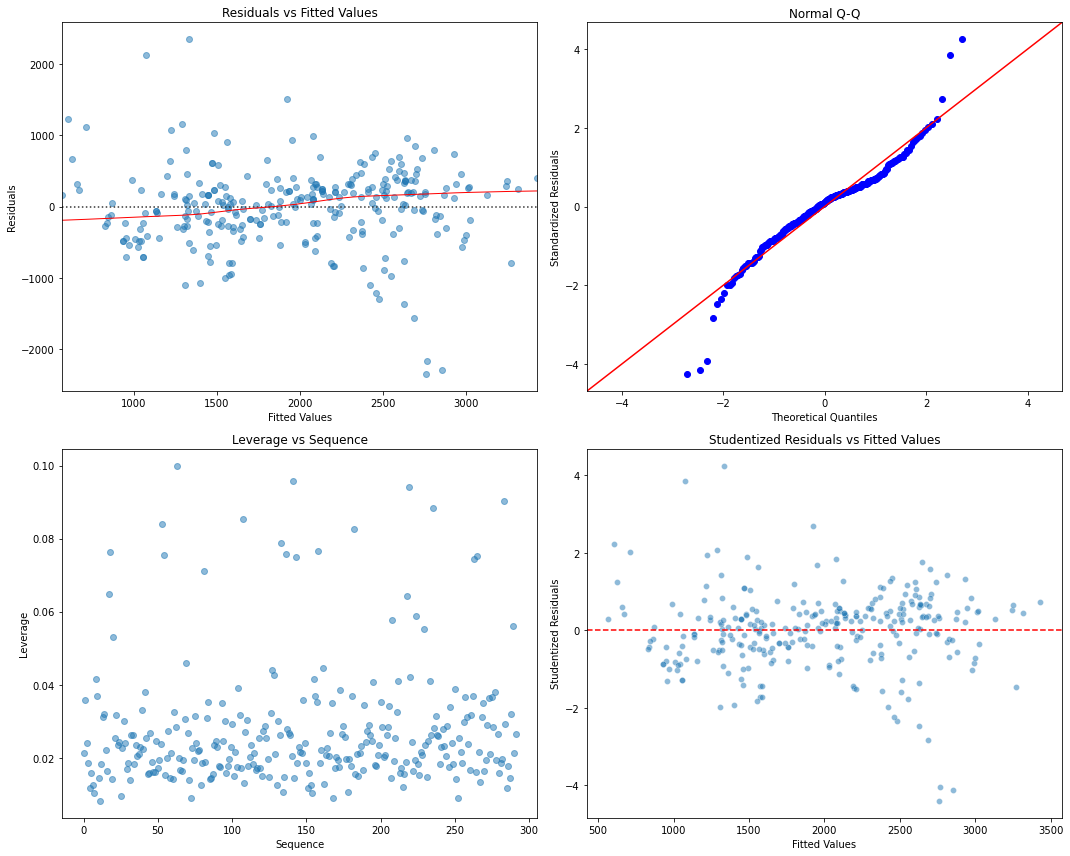

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/Users/dhruvtrivedi/Downloads/Final Project Stat 371/Final_Transformed_Farm_Data_Gujarat_v2.csv'
data = pd.read_csv(file_path)


# Model with "Number of Cows", "Number of Buffaloes", "Daily Expenditure on Animal Health (INR)", "dynamix dairy", "Daily Revenue (INR)", "Daily Income from Selling Manure (INR)", and "natural plants"
X_current_final = sm.add_constant(farm_data[['Number of Cows', 'Number of Buffaloes', 'Daily Expenditure on Animal Health (INR)', 'dynamix dairy', 'Daily Revenue (INR)', 'Daily Income from Selling Manure (INR)', 'natural plants']])
model_final = sm.OLS(y, X_current_final).fit()

# AIC of the final model
model_final_aic = model_final.aic
model_final_aic, model_final.summary()

# Calculate residuals and leverage
residuals = model_final.resid
fitted_vals = model_final.predict(X_current_final)
leverage = model_final.get_influence().hat_matrix_diag
studentized_residuals = model_final.get_influence().resid_studentized_internal

# Create sequence of numbers for plotting
sequence = np.arange(len(residuals))

# Create the 4 plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Residuals vs Fitted Values
sns.residplot(fitted_vals, y, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 0])
axs[0, 0].set_title('Residuals vs Fitted Values')
axs[0, 0].set_xlabel('Fitted Values')
axs[0, 0].set_ylabel('Residuals')

# Normal Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q')
axs[0, 1].set_xlabel('Theoretical Quantiles')
axs[0, 1].set_ylabel('Standardized Residuals')

# Leverage vs Sequence
axs[1, 0].scatter(sequence, leverage, alpha=0.5)
axs[1, 0].set_title('Leverage vs Sequence')
axs[1, 0].set_xlabel('Sequence')
axs[1, 0].set_ylabel('Leverage')

# Studentized Residuals vs Fitted Values
sns.scatterplot(fitted_vals, studentized_residuals, ax=axs[1, 1], alpha=0.5)
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_title('Studentized Residuals vs Fitted Values')
axs[1, 1].set_xlabel('Fitted Values')
axs[1, 1].set_ylabel('Studentized Residuals')

plt.tight_layout()
plt.show()
